In [ ]:
#!/usr/bin/env python3

#*Model with Diffuse Prior*

import pandas as pd
import pystan



In [3]:
oDataFrame = pd.read_csv('https://raw.githubusercontent.com/carlson9/KocPython2019/master/Homework/trend2.csv').drop("cc", axis = "columns").dropna()

In [4]:
STAN_MODEL = """
data {
    int<lower=0> N_COUNTRIES;
    int<lower=0> N_SAMPLES;
    int<lower=1, upper=N_COUNTRIES> country[N_SAMPLES];
    vector[N_SAMPLES] gini_net;
    vector[N_SAMPLES] rgdpl;
    vector[N_SAMPLES] church2;
}

parameters {
    vector[N_COUNTRIES] a;
    real beta_1;
    real beta_2;
    real mu_a;
    real<lower=0,upper=100> sigma_a;
    real<lower=0,upper=100> sigma_y;
}

transformed parameters {
    vector[N_SAMPLES] y_hat;
    for (i in 1:N_SAMPLES)
        y_hat[i] = a[country[i]] + gini_net[i] * beta_1 + rgdpl[i] * beta_2;
}

model {
    sigma_a ~ uniform(0, 100);
    a ~ normal(mu_a, sigma_a);
    beta_1 ~ cauchy(0,25);
    beta_2 ~ normal(0,1);
    sigma_y ~ uniform(0, 100);
    church2 ~ normal(y_hat, sigma_y);
}
"""


oDataFrame.country = oDataFrame.country.str.strip()



In [13]:
aUniqueCountries = oDataFrame.country.unique()
mCountryLookup = { aData[0]: aData[1] for aData in zip(aUniqueCountries, range(aUniqueCountries.size)) }
oDataFrame.country = oDataFrame.country.replace(mCountryLookup)



In [14]:
mStanData = {
    "N_COUNTRIES": aUniqueCountries.size,
    "N_SAMPLES":   oDataFrame.count()[0],
    "country":     (oDataFrame.country + 1).values, # Stan is 1-indexed
    "gini_net":    oDataFrame.gini_net.values,
    "rgdpl":       oDataFrame.rgdpl.values,
    "church2":     oDataFrame.church2.values
}

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_27af5d3d9b1ad4374dd44ffc1c339fb3 NOW.


Inference for Stan model: anon_model_27af5d3d9b1ad4374dd44ffc1c339fb3.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

             mean se_mean     sd   2.5%     25%    50%    75%  97.5%  n_eff   Rhat
a[1]        19.13    0.54   4.23   10.7   16.16  19.33  22.12   27.0     62   1.03
a[2]        22.11    0.49   3.93  14.28   19.46  22.23  24.86  29.33     65   1.03
a[3]        18.49    0.44   3.46  11.43    16.1  18.67  21.02  24.81     62   1.03
a[4]         0.31    0.49   4.16  -7.68   -2.63   0.26   3.34   8.15     71   1.02
a[5]        28.01    0.55   4.41   19.2   24.96  28.22  31.25   36.4     64   1.03
a[6]        11.14    0.87   6.88  -2.05    6.27  11.07  16.22  23.78     62   1.03
a[7]        11.58    0.51   4.47   2.72    8.54  11.69  14.55  20.78     77   1.02
a[8]         6.95    0.44   3.63  -0.15    4.54   6.99   9.57  13.78     68   1.03
a[9]         7.18    0.45   3.48   0.25     4.8   7.32   9.64  13.

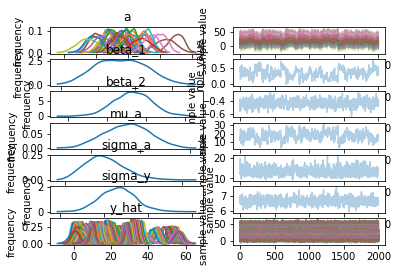

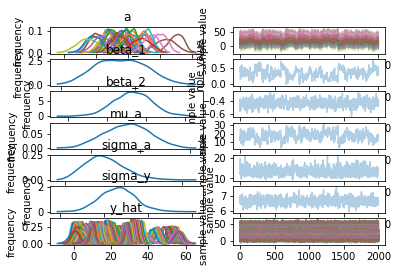

In [15]:
oStanModel = pystan.StanModel(model_code = STAN_MODEL)
oFit = oStanModel.sampling(data = mStanData, iter = 1000, chains = 4)
print(oFit)




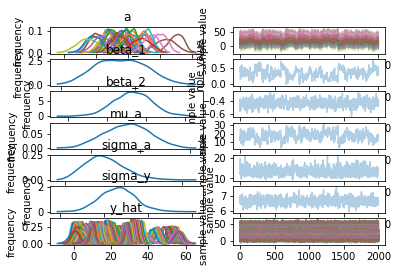

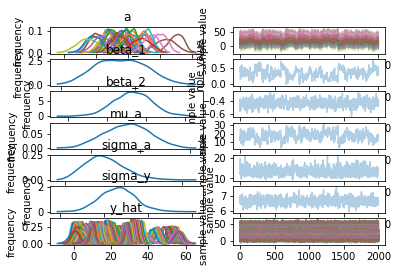

In [16]:
oFit.plot()

In [18]:
#*Model with highly informative Prior*

import pandas as pd
import pystan

In [19]:
oDataFrame = pd.read_csv('https://raw.githubusercontent.com/carlson9/KocPython2019/master/Homework/trend2.csv').drop("cc", axis = "columns").dropna()

In [1]:

STAN_MODEL = """
data {
    int<lower=0> N_COUNTRIES;
    int<lower=0> N_SAMPLES;
    int<lower=1, upper=N_COUNTRIES> country[N_SAMPLES];
    vector[N_SAMPLES] gini_net;
    vector[N_SAMPLES] rgdpl;
    vector[N_SAMPLES] church2;
}

parameters {
    vector[N_COUNTRIES] a;
    real beta_1;
    real beta_2;
    real mu_a;
    real<lower=0,upper=100> sigma_a;
    real<lower=0,upper=100> sigma_y;
}

transformed parameters {
    vector[N_SAMPLES] y_hat;
    for (i in 1:N_SAMPLES)
        y_hat[i] = a[country[i]] + gini_net[i] * beta_1 + rgdpl[i] * beta_2;
}

model {
    sigma_a ~ uniform(0, 100);
    a ~ normal(mu_a, sigma_a);
    beta_1 ~ normal(16,17);
    beta_2 ~ normal(0,1);
    sigma_y ~ uniform(0, 100);
    church2 ~ normal(y_hat, sigma_y);
}
"""

In [21]:

oDataFrame.country = oDataFrame.country.str.strip()

In [22]:
aUniqueCountries = oDataFrame.country.unique()
mCountryLookup = { aData[0]: aData[1] for aData in zip(aUniqueCountries, range(aUniqueCountries.size)) }
oDataFrame.country = oDataFrame.country.replace(mCountryLookup)

In [23]:
mStanData = {
    "N_COUNTRIES": aUniqueCountries.size,
    "N_SAMPLES":   oDataFrame.count()[0],
    "country":     (oDataFrame.country + 1).values, # Stan is 1-indexed
    "gini_net":    oDataFrame.gini_net.values,
    "rgdpl":       oDataFrame.rgdpl.values,
    "church2":     oDataFrame.church2.values
}

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_862ca2013bf9b62047a0fc918c0d9bc6 NOW.


Inference for Stan model: anon_model_862ca2013bf9b62047a0fc918c0d9bc6.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a[1]        20.03    0.47   3.99  12.53  17.23  19.87  22.76  28.31     72   1.02
a[2]        22.89    0.43   3.82   16.0  20.23  22.65  25.51  30.32     79   1.02
a[3]        19.13    0.38   3.38  12.81  16.76  18.97  21.49   25.8     77   1.02
a[4]         1.36    0.45   4.07  -6.22   -1.4   1.16   4.07   9.99     81   1.02
a[5]        28.83    0.47   4.33   20.4  25.82  28.71  31.73  37.96     84   1.02
a[6]        12.87    0.79    6.5   0.88   8.28  12.69  17.19  26.67     68   1.03
a[7]        12.26    0.43   4.26   4.45   9.36  12.02  15.12  21.02     99   1.02
a[8]         7.79    0.39   3.51   1.28   5.23   7.73  10.28  14.91     79   1.02
a[9]         7.86     0.4   3.39   1.77   5.39   7.76   10.2  14.71     73 

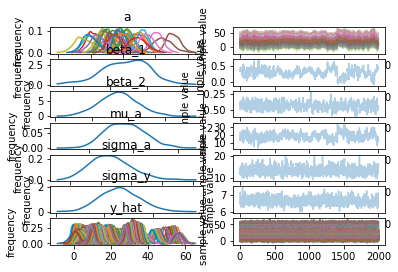

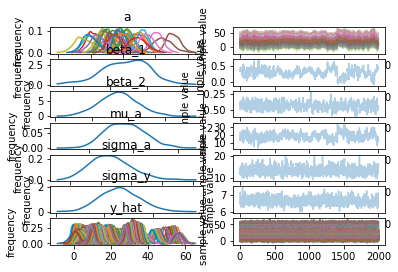

In [24]:
oStanModel = pystan.StanModel(model_code = STAN_MODEL)
oFit = oStanModel.sampling(data = mStanData, iter = 1000, chains = 4)
print(oFit)


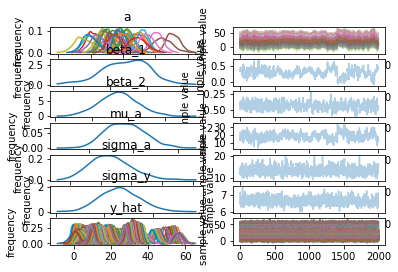

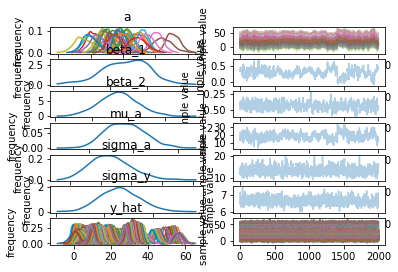

In [25]:
oFit.plot()